In [1]:
import os
from harmonize_simplecube import simple_cube

In [2]:
path_dir = os.path.abspath("")

In [3]:
S2_NIR_cube=simple_cube(
    data_dir=os.path.join(path_dir),
    collection="S2-16D-DOMINICAN-1",
    start_date="2023-01-01",
    end_date="2023-12-31",
    bbox="-71.4908,18.9115,-70.8920,19.4329",
    bands=["B08"]
)

S2_NIR_cube

['055027']


Downloading... : 100%|██████████| 23/23 [00:01<00:00, 20.09 itens/s]


Successfully download 23 files to S2-16D-DOMINICAN-1


<xarray.Dataset> Size: 3GB
Dimensions:      (band: 1, x: 6373, y: 5853, time: 23)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 51kB 2.376e+05 2.376e+05 ... 3.013e+05 3.014e+05
  * y            (y) float64 47kB 2.151e+06 2.151e+06 ... 2.092e+06 2.092e+06
    spatial_ref  int64 8B 0
  * time         (time) datetime64[ns] 184B 2023-01-01 2023-01-17 ... 2023-12-19
Data variables:
    band_data    (time, band, y, x) float32 3GB 1.299e+03 ... 1.774e+03

In [4]:
from wcpms_server import params_phenometrics, phenometrics_data_cube

/home/sansigolo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
config = params_phenometrics(
    peak_metric='pos', 
    base_metric='vos', 
    method='seasonal_amplitude', 
    factor=0.2, 
    thresh_sides='two_sided', 
    abs_value=0.1
)

In [6]:
ds_phenos = phenometrics_data_cube(
    da=S2_NIR_cube['band_data'],
    engine='phenolopy',
    config=config
)

ds_phenos

<xarray.Dataset> Size: 3GB
Dimensions:      (band: 1, y: 5853, x: 6373)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 51kB 2.376e+05 2.376e+05 ... 3.013e+05 3.014e+05
  * y            (y) float64 47kB 2.151e+06 2.151e+06 ... 2.092e+06 2.092e+06
    spatial_ref  int32 4B 32619
    time         (band, y, x) datetime64[ns] 298MB 2023-06-10 ... 2023-05-25
Data variables: (12/18)
    pos_values   (band, y, x) float32 149MB 5.375e+03 5.644e+03 ... 2.265e+03
    pos_times    (band, y, x) float32 149MB 161.0 161.0 161.0 ... 145.0 145.0
    mos_values   (band, y, x) float32 149MB 5.375e+03 5.364e+03 ... 2.048e+03
    vos_values   (band, y, x) float32 149MB 1.299e+03 1.498e+03 ... 1.336e+03
    vos_times    (band, y, x) float32 149MB 1.0 1.0 1.0 65.0 ... 1.0 1.0 1.0 1.0
    bse_values   (band, y, x) float32 149MB 1.797e+03 2.084e+03 ... 1.356e+03
    ...           ...
    roi_values   (band, y, x) float32 149MB 24.68 26.08 25.94 ... 6.991 7.979
    rod_values   (band, y, x) float32 149MB 44.23 46.45 40.81 ... 3.841 3.892
    lios_values  (band, y, x) float32 149MB nan nan nan ... nan nan nan
    sios_values  (band, y, x) float32 149MB nan nan nan 1.2e+04 ... nan nan nan
    liot_values  (band, y, x) float32 149MB nan nan nan nan ... nan nan nan nan
    siot_values  (band, y, x) float32 149MB nan nan nan nan ... nan nan nan nan
Attributes:
    grid_mapping:  spatial_ref

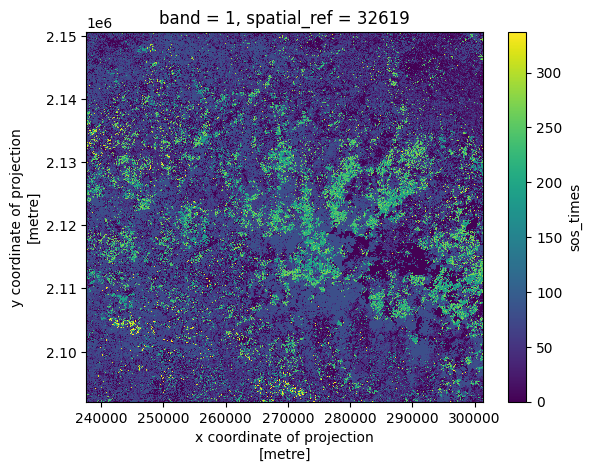

In [7]:
ds_phenos_2d = ds_phenos['sos_times']

ds_phenos_2d.plot()